In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
# it contain all the necessary information that you need in ARIMA
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()
# from here we see that there is one null value and remove that

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
# there is only one nan value so we are just dropping that
df_airline.dropna(axis=0,inplace=True)

In [7]:
df_airline.isnull().sum()
# now no null value

Month                      0
Thousands of Passengers    0
dtype: int64

In [9]:
df_airline.info()
# we can see month is not the object so we are converting this into the datetime Datatype

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [10]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [11]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [12]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [13]:
# setting month as an index to plot it

In [14]:
df_airline.set_index('Month',inplace=True)

In [15]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

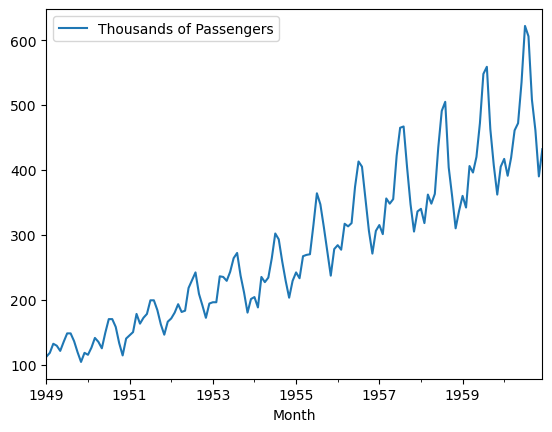

In [16]:
df_airline.plot()
# pov looks the graph is look like seasonal data as it is moving up and down

In [17]:
# if it is a sesonal data it cannot be a stationary data
# Data set should not be seasonal
# so using DICKEY FULLER TEST

In [19]:
# Libarary for dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [20]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0])) # ADF is augmented Dickey–Fuller test
    print('p- value: {}'.format(result[1]))
    if result [1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
adf_test(df_airline['Thousands of Passengers'])
# we can see the output that the data is not stationary so applying differencing

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [23]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)
# basically in this steps we have done shifting

In [24]:
df_airline.head()
# This result is after shift of column and difference

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [25]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169992
p- value: 0.0542132902838265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [28]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [29]:
df_airline.head()
# Again we can see the output that the data is not stationary so applying differencing

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [30]:
adf_test(df_airline['Passengers Second Difference'].dropna())


ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In the context of the Augmented Dickey-Fuller (ADF) test, the null hypothesis assumes that a unit root is present in a time series, indicating that the series is non-stationary. The alternative hypothesis suggests stationarity.

In your output:

ADF Statistics: -2.829266824169992
p-value: 0.0542132902838265
The p-value is compared to a significance level (often denoted as α) to decide whether to reject the null hypothesis. Common significance levels are 0.05 or 0.01.

If p-value < α: Reject the null hypothesis.

If p-value ≥ α: Fail to reject the null hypothesis.

In your case, the p-value is 0.0542, which is greater than 0.05 (assuming a significance level of 0.05). Therefore, you fail to reject the null hypothesis. The statement "weak evidence against the null hypothesis" suggests that there is not enough evidence to conclude that the series is stationary based on the ADF test at the 0.05 significance level.

If you were to accept the null hypothesis (i.e., conclude that the time series is non-stationary), you would typically need a p-value greater than or equal to the chosen significance level. In this case, with a significance level of 0.05, you might consider the null hypothesis accepted when the p-value is 0.05 or greater.






In [31]:
### For 12 months
# ARIMA will best works for a year data not for seasobal data
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [32]:
adf_test(df_airline['Passengers 12 Difference'].dropna())
# it is stationary so we can aplly

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [33]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

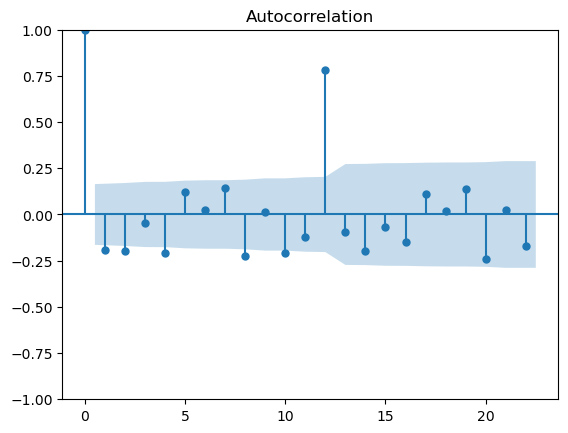

In [35]:
# acf = auto corelation plot
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

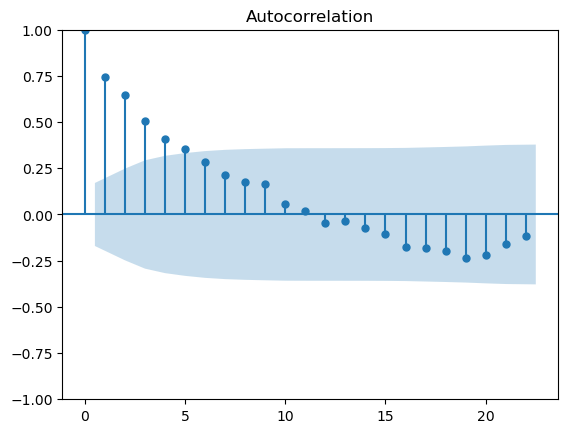

In [36]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
# From here we can count the value of q (from auto co relation)
# q=5 as it there 5 line above the bound and inside the bound

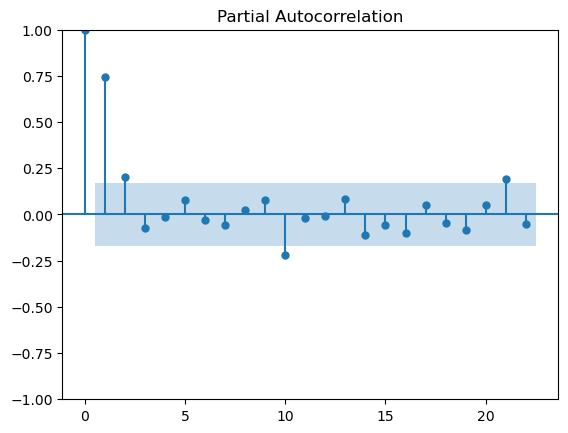

In [38]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
# we can calculate p value 

In [1]:
df_airline

NameError: name 'df_airline' is not defined

In [ ]:
# upto here for today

In [42]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [43]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
# With the help of pacf we are performing Auto regression we are finding p value
# with the help of acf we are performing moving average we are finding q value
# d is basically difference 

In [45]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


# ARIMA

In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [57]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
model_ARIMA_fit=model_ARIMA.fit()

In [63]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 29 Feb 2024   AIC                            736.477
Time:                             19:06:54   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## prediction 

In [60]:
## prediction 
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [79]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

In [71]:
pred

1956-01-01    300.183614
1956-02-01    309.478356
1956-03-01    316.443014
1956-04-01    307.827542
1956-05-01    318.544233
1956-06-01    348.922083
1956-07-01    366.020290
1956-08-01    346.567535
1956-09-01    332.120967
1956-10-01    307.734752
1956-11-01    311.623911
1956-12-01    339.828198
1957-01-01    349.840408
1957-02-01    356.098235
1957-03-01    350.687826
1957-04-01    350.080462
1957-05-01    361.157693
1957-06-01    381.216518
1957-07-01    382.319377
1957-08-01    372.852580
1957-09-01    364.110094
1957-10-01    356.108923
1957-11-01    371.293790
1957-12-01    385.323598
1958-01-01    392.077841
1958-02-01    391.405851
1958-03-01    388.404579
1958-04-01    391.572857
1958-05-01    402.448082
1958-06-01    413.255688
1958-07-01    410.853418
1958-08-01    407.670544
1958-09-01    402.486334
1958-10-01    406.089147
1958-11-01    418.125316
1958-12-01    426.012379
1959-01-01    429.205584
1959-02-01    427.352232
1959-03-01    428.150988
1959-04-01    432.790849


In [67]:
residuals

Month
1956-01-01    -16.183614
1956-02-01    -32.478356
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544233
1956-06-01     25.077917
1956-07-01     46.979710
1956-08-01     58.432465
1956-09-01     22.879033
1956-10-01     -1.734752
1956-11-01    -40.623911
1956-12-01    -33.828198
1957-01-01    -34.840408
1957-02-01    -55.098235
1957-03-01      5.312174
1957-04-01     -2.080462
1957-05-01     -6.157693
1957-06-01     40.783482
1957-07-01     82.680623
1957-08-01     94.147420
1957-09-01     39.889906
1957-10-01     -9.108923
1957-11-01    -66.293790
1957-12-01    -49.323598
1958-01-01    -52.077841
1958-02-01    -73.405851
1958-03-01    -26.404579
1958-04-01    -43.572857
1958-05-01    -39.448082
1958-06-01     21.744312
1958-07-01     80.146582
1958-08-01     97.329456
1958-09-01      1.513666
1958-10-01    -47.089147
1958-11-01   -108.125316
1958-12-01    -89.012379
1959-01-01    -69.205584
1959-02-01    -85.352232
1959-03-01    -22.150988
1959-04-01    -36.7

<Axes: ylabel='Density'>

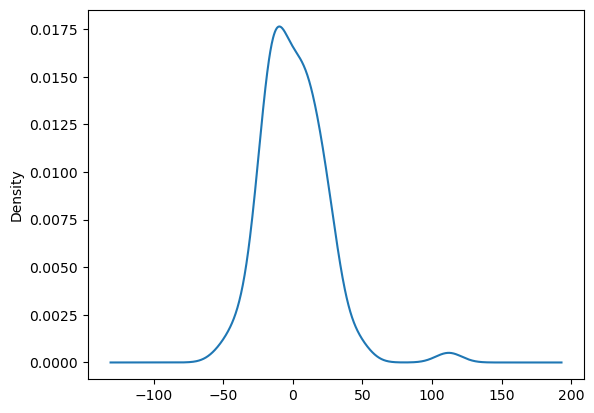

In [68]:
model_ARIMA_fit.resid.plot(kind='kde')

In [69]:
test_data['Predicted_ARIMA']=pred

C:\Users\PAWAN JAIN\AppData\Local\Temp\ipykernel_26664\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

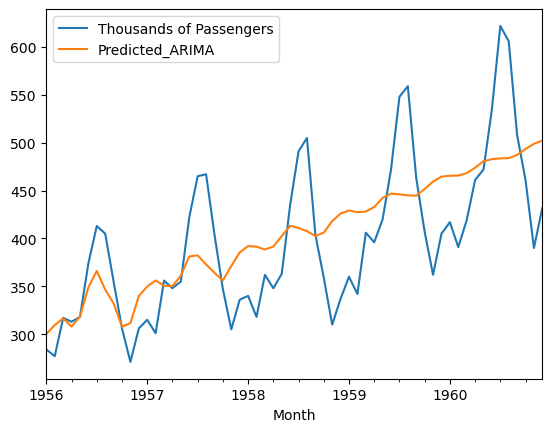

In [70]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

In [72]:
## Create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [76]:
model_SARIMA_fit=model_SARIMA.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 29 Feb 2024   AIC                            548.481
Time:                                     19:27:36   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5982      0.937      0.638      0.523      -1.239       2.435
ar.L2          0.8311      0.232      3.582      0.000       0.376       1.286
ar.L3         -0.4523      0.894     -0.506      0.613      -2.204       1.299
ma.L1          0.1839      1.164      0.158      0.874      -2.097       2.465
ma.L2         -0.5340      1.262     -0.423      0.672      -3.007       1.939
ma.L3         -0.0987      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7334     81.111      1.082      0.279     -71.240     246.707
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

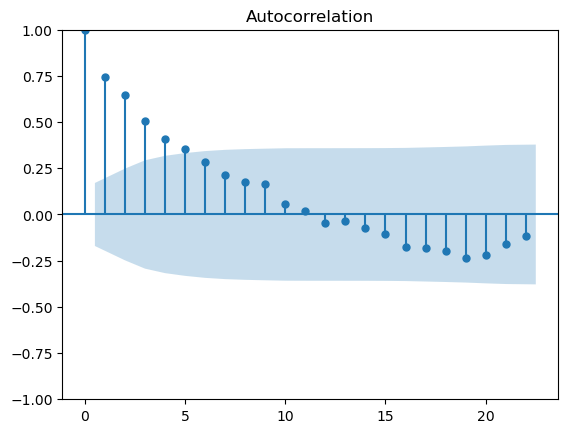

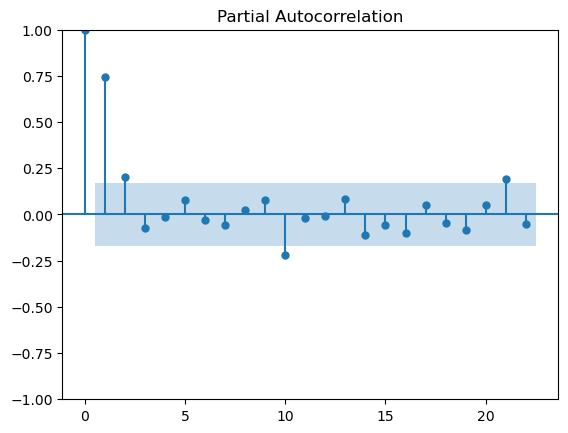

In [74]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).

In [78]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883983
1960-09-01,508.0,-98.0,-82.0,45.0,487.184107
1960-10-01,461.0,-47.0,51.0,54.0,493.432789
1960-11-01,390.0,-71.0,-24.0,28.0,498.930080
1960-12-01,432.0,42.0,113.0,27.0,502.159831


In [75]:
test_data['Predicted_SARIMA']=pred_Sarima


NameError: name 'pred_Sarima' is not defined